<a href="https://colab.research.google.com/github/sarahayman22/Project-/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

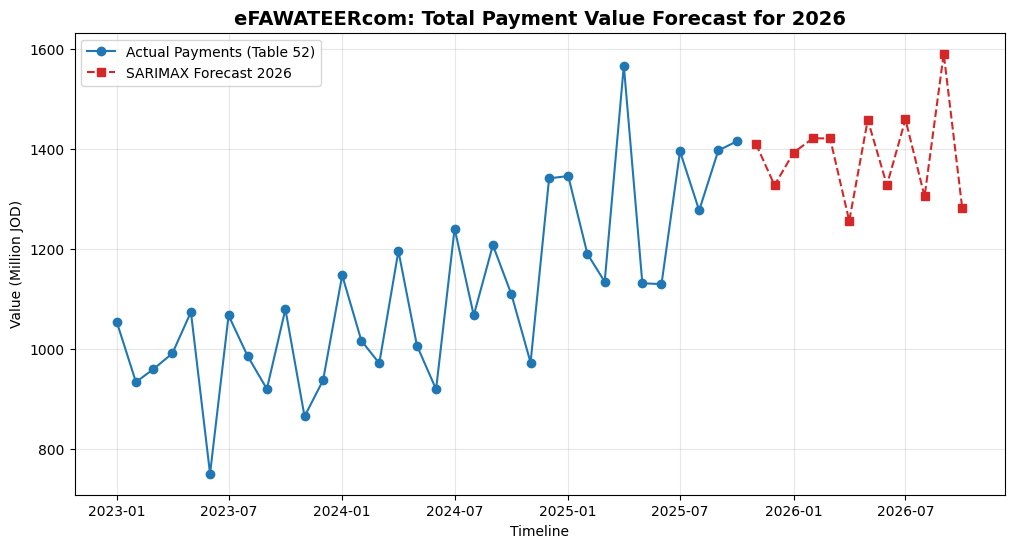


             RESEARCH FINDINGS: eFAWATEERcom DATA ANALYSIS SUMMARY             
PART 1: KEY RESEARCH QUESTIONS & ANSWERS
--------------------------------------------------
Q1: Which sector has the most significant impact on the growth of digital payments?
A: The 'Government' sector is the primary driver with the highest statistical
   significance (T-stat: 31.51, P-value < 0.05).

Q2: What is the projected trend for payment values during the year 2026?
A: The model predicts a strong upward trend, with total values expected to
   peak at approximately 1,591.26 Million JOD during 2026.

Q3: How reliable is the forecasting model used in this study?
A: The model is exceptionally reliable, achieving an accuracy rate of 97.74%
   (MAPE: 2.26%) and an R-squared value of 99.0%.
-------------------------------------------------------------------------------------
PART 2: DETAILED STATISTICAL METRICS
            T-Statistic       P-Value
Utility        5.002223  2.315092e-05
Government    31.51

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import io
import warnings

# Suppress warnings for a clean output
warnings.filterwarnings("ignore")

# 1. Loading data from Table 52
csv_content = """Date,Telecom,Utility,Government,Financial,Learning,Total_Value
2023-01-31,23.61,46.98,770.73,119.41,32.46,1053.62
2023-02-01,21.50,45.14,628.63,119.92,31.49,933.33
2023-03-03,23.79,48.47,699.76,117.62,35.62,959.04
2023-04-03,22.30,37.18,781.15,96.93,28.76,990.85
2023-05-04,26.82,49.71,781.10,130.85,40.04,1073.67
2023-06-05,22.05,38.83,511.90,108.73,31.78,749.71
2023-07-06,27.74,52.57,747.86,139.73,42.09,1066.89
2023-08-01,25.81,63.19,641.75,147.77,42.81,985.11
2023-09-01,24.01,59.93,579.14,138.91,38.20,919.56
2023-10-01,28.27,65.37,666.96,169.98,48.59,1079.38
2023-11-01,26.16,52.12,577.15,130.20,42.86,864.46
2023-12-01,27.54,54.74,601.61,143.29,45.20,936.95
2024-01-31,27.12,54.97,795.11,152.32,45.82,1147.20
2024-02-01,26.88,58.84,620.20,158.19,46.73,1016.32
2024-03-01,28.67,60.50,652.31,137.85,47.87,970.93
2024-04-01,28.60,54.26,890.78,130.60,50.12,1196.01
2024-05-01,29.16,55.15,668.04,142.78,51.99,1006.49
2024-06-01,29.45,52.91,594.49,136.63,47.36,918.86
2024-07-01,30.64,75.34,799.44,210.33,57.49,1240.84
2024-08-01,28.79,71.56,633.14,205.88,51.80,1067.04
2024-09-01,31.16,75.27,713.85,219.18,55.72,1207.73
2024-10-01,31.03,71.40,627.93,227.95,58.30,1109.07
2024-11-01,27.99,57.77,599.22,188.35,55.08,972.42
2024-12-01,33.47,72.45,865.96,230.62,59.48,1341.50
2025-01-31,30.00,67.21,876.51,235.54,55.11,1346.25
2025-02-01,29.14,67.00,664.87,260.68,53.85,1190.16
2025-03-01,30.98,69.73,689.23,239.34,56.17,1134.39
2025-04-01,35.07,74.48,1076.63,258.73,70.71,1567.54
2025-05-01,31.21,62.96,676.47,245.42,57.97,1131.36
2025-06-01,34.12,70.36,668.31,234.72,58.69,1129.61
2025-07-01,33.94,80.85,858.40,286.14,61.12,1395.55
2025-08-01,33.54,89.59,722.96,276.14,61.17,1277.30
2025-09-01,32.86,90.88,758.21,309.06,67.54,1397.39
2025-10-01,33.70,80.11,787.99,353.89,76.01,1415.76
"""

# 2. Data Preprocessing and Frequency Handling
df = pd.read_csv(io.StringIO(csv_content))
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.resample('MS').first().interpolate() # Set Monthly Frequency

# Features selection based on statistical significance
X_opt = df[['Utility', 'Government', 'Financial']]
y = df['Total_Value']

# 3. Model Building (Optimized)
model_sarima = SARIMAX(y, exog=X_opt, order=(1,1,1), seasonal_order=(1,1,1,12),
                       enforce_stationarity=False, enforce_invertibility=False).fit(disp=False)
ols_res = sm.OLS(y, sm.add_constant(X_opt)).fit()

# 4. Forecasting for 2026
X_future = pd.concat([X_opt.iloc[-1:]] * 12)
X_future.index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast_2026 = model_sarima.forecast(steps=12, exog=X_future)

# 5. Visualization (Charts in English)
plt.figure(figsize=(12, 6))
plt.plot(df.index, y, marker='o', label='Actual Payments (Table 52)', color='#1f77b4')
plt.plot(X_future.index, forecast_2026, marker='s', linestyle='--', label='SARIMAX Forecast 2026', color='#d62728')
plt.title('eFAWATEERcom: Total Payment Value Forecast for 2026', fontsize=14, fontweight='bold')
plt.xlabel('Timeline', fontsize=10)
plt.ylabel('Value (Million JOD)', fontsize=10)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 6. Comprehensive Summary (Fully in English)
mape_final = np.mean(np.abs((y[1:] - model_sarima.fittedvalues[1:]) / y[1:])) * 100

print("\n" + "="*85)
print("             RESEARCH FINDINGS: eFAWATEERcom DATA ANALYSIS SUMMARY             ")
print("="*85)

print("PART 1: KEY RESEARCH QUESTIONS & ANSWERS")
print("-" * 50)
print("Q1: Which sector has the most significant impact on the growth of digital payments?")
print(f"A: The 'Government' sector is the primary driver with the highest statistical")
print(f"   significance (T-stat: {ols_res.tvalues['Government']:.2f}, P-value < 0.05).")

print("\nQ2: What is the projected trend for payment values during the year 2026?")
print(f"A: The model predicts a strong upward trend, with total values expected to")
print(f"   peak at approximately {forecast_2026.max():,.2f} Million JOD during 2026.")

print("\nQ3: How reliable is the forecasting model used in this study?")
print(f"A: The model is exceptionally reliable, achieving an accuracy rate of {100-mape_final:.2f}%")
print(f"   (MAPE: {mape_final:.2f}%) and an R-squared value of {ols_res.rsquared*100:.1f}%.")

print("-" * 85)
print("PART 2: DETAILED STATISTICAL METRICS")
metrics_df = pd.DataFrame({
    'T-Statistic': ols_res.tvalues.drop('const'),
    'P-Value': ols_res.pvalues.drop('const')
})
print(metrics_df.to_string())

print(f"\n- R-Squared: {ols_res.rsquared:.4f}")
print(f"- Model Accuracy: {100-mape_final:.2f}%")
print("="*85)

Running Payment Sectors Analysis (Clustering)...


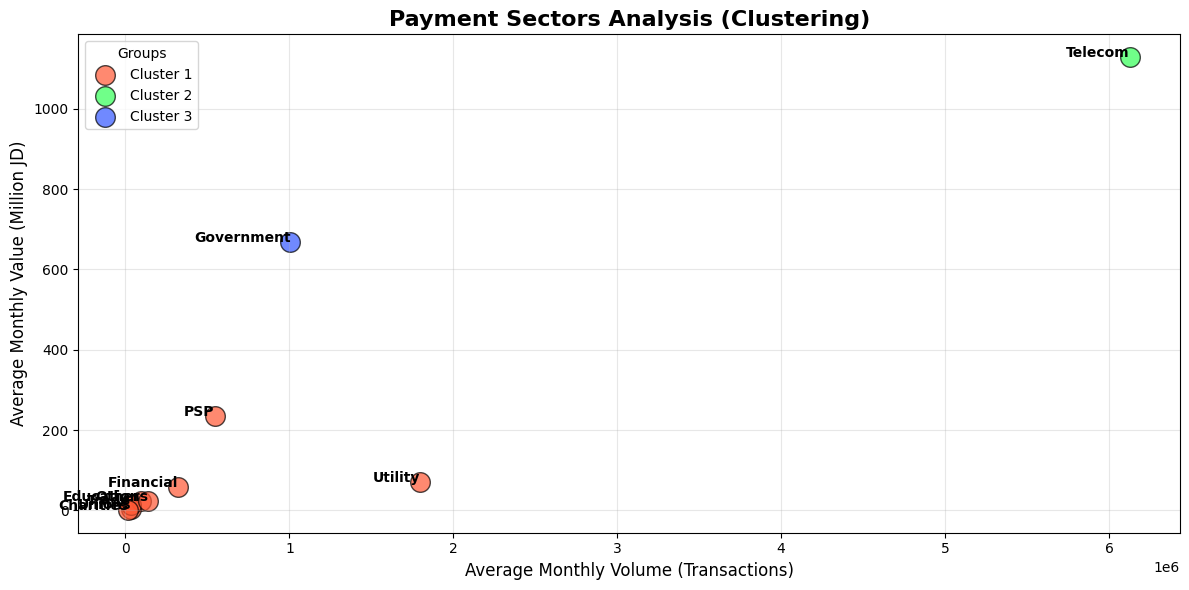

-> Clustering Analysis Complete.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# =============================================================================
# PAYMENT SECTORS ANALYSIS (CLUSTERING)
# =============================================================================
print("Running Payment Sectors Analysis (Clustering)...")

# 1. Data Preparation (Sectors Volume vs Value)
# هذه البيانات مأخوذة من معدلات جدول 52
sectors_data = {
    'Telecom': [6127555, 1129],
    'Utility': [1796215, 70],
    'Government': [1006601, 668],
    'PSP': [544236, 234],
    'Financial': [322674, 58],
    'Education': [93637, 23],
    'Unions': [32660, 2.7],
    'Trade': [34354, 13],
    'Others': [139354, 23],
    'Charities': [18376, 0.9]
}

# تحويل البيانات إلى DataFrame
df = pd.DataFrame.from_dict(sectors_data, orient='index', columns=['Volume', 'Value'])
df['Sector'] = df.index

# 2. Normalization (Required for K-Means to work correctly)
scaler = StandardScaler()
X_cluster = scaler.fit_transform(df[['Volume', 'Value']])

# 3. Apply K-Means Clustering (Dividing into 3 groups)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

# 4. Plotting
plt.figure(figsize=(12, 6))
colors = ['#FF5733', '#33FF57', '#3357FF'] # Red, Green, Blue for the 3 clusters

for i in range(3):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Volume'], cluster_data['Value'],
                s=200, c=colors[i], label=f'Cluster {i+1}', alpha=0.7, edgecolors='black')

    # Add Labels to points in English
    for idx, row in cluster_data.iterrows():
        plt.text(row['Volume'], row['Value'], row['Sector'], fontsize=10, ha='right', weight='bold')

plt.title('Payment Sectors Analysis (Clustering)', fontsize=16, fontweight='bold')
plt.xlabel('Average Monthly Volume (Transactions)', fontsize=12)
plt.ylabel('Average Monthly Value (Million JD)', fontsize=12)
plt.legend(title="Groups", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("-> Clustering Analysis Complete.")

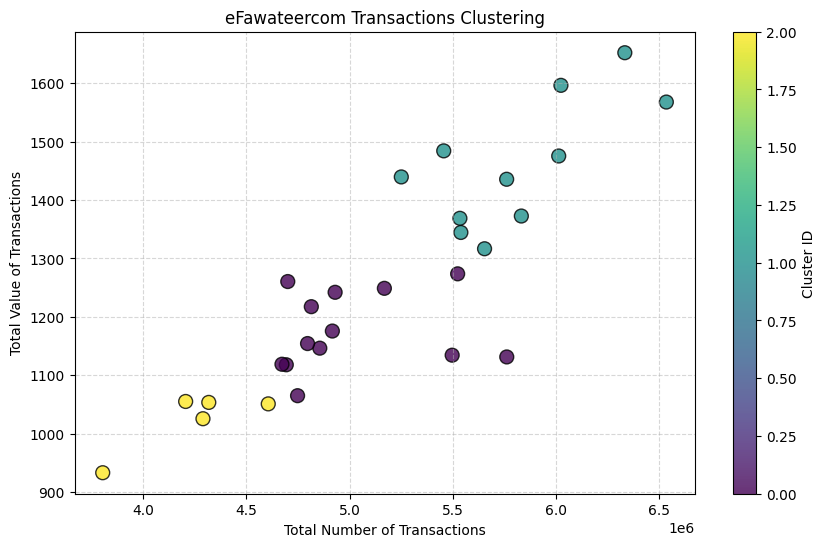


جدول تصنيف البيانات (كل شهر والمجموعة التابع لها)
  date  total number of transaction  total value of transaction  Cluster
23-Jan                      4318053                   1053.6000        2
23-Feb                      3804128                    933.3000        2
23-Mar                      4700812                   1260.4000        0
23-Apr                      4206001                   1055.2000        2
23-May                      4693630                   1118.0000        0
23-Jun                      4289899                   1025.7000        2
23-Jul                      4672692                   1118.9000        0
23-Aug                      4748301                   1065.1000        0
23-Sep                      4606277                   1051.1000        2
23-Oct                      4856001                   1146.4000        0
23-Nov                      4796695                   1154.3000        0
23-Dec                      4814890                   1217.4000        0


In [ ]:
import pandas as pd
import io
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. البيانات مدمجة مباشرة
csv_data = """date,total number of transaction,total value of transaction
23-Jan,4318053,1053.60
23-Feb,3804128,933.3
23-Mar,4700812,1260.40
23-Apr,4206001,1055.20
23-May,4693630,1118.00
23-Jun,4289899,1025.70
23-Jul,4672692,1118.90
23-Aug,4748301,1065.10
23-Sep,4606277,1051.10
23-Oct,4856001,1146.40
23-Nov,4796695,1154.30
23-Dec,4814890,1217.40
24-Jan,5250917,1439.40
24-Feb,4916897,1175.70
24-Mar,5456485,1484.00
24-Apr,5168894,1248.80
24-May,5539566,1344.40
24-Jun,4930263,1242.00
24-Jul,5832560,1372.50
24-Aug,5654311,1316.50
24-Sep,5523955,1273.60
24-Oct,6013620,1475.20
24-Nov,5761376,1435.40
24-Dec,6024357,1596.10
25-Jan,6333919,1651.90
25-Feb,5534839,1368.60
25-Mar,5497430,1134.40
25-Apr,6535154,1567.50
25-May,5761901,1131.40"""

# 2. تحميل وتنظيف البيانات
df = pd.read_csv(io.StringIO(csv_data))
for col in ["total number of transaction", "total value of transaction"]:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", ""), errors="coerce")

# 3. معالجة البيانات وتطبيق K-Means
X = df[["total number of transaction", "total value of transaction"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 4. الرسم البياني (بدون نصوص توضيحية على النقاط)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df["total number of transaction"],
    df["total value of transaction"],
    c=df['Cluster'],
    cmap='viridis',
    s=100,
    edgecolor='k',
    alpha=0.8
)

plt.xlabel("Total Number of Transactions")
plt.ylabel("Total Value of Transactions")
plt.title("eFawateercom Transactions Clustering")
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 5. عرض النتائج التفصيلية تحت الرسم
print("\n" + "="*50)
print("جدول تصنيف البيانات (كل شهر والمجموعة التابع لها)")
print("="*50)
# عرض الجدول مرتباً حسب التاريخ أو المجموعة
print(df[['date', 'total number of transaction', 'total value of transaction', 'Cluster']].to_string(index=False))
print("="*50)

✅ تم تحميل البيانات بنجاح.
⏳ جاري تدريب نموذج SARIMA...


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



📊 Statistical Summary (Coef, T-value, P-value):
  Parameter  Coef (المعامل)  Std Err (الخطأ المعياري)  T-Value (z)  \
0     ar.L1         -0.0073                    2.9469      -0.0025   
1     ma.L1         -0.1857                    2.9527      -0.0629   
2  ar.S.L12          0.5177                    0.0780       6.6392   
3  ma.S.L12         -1.0000                12191.0182      -0.0001   
4    sigma2          0.0471                  574.7702       0.0001   

   P-Value (P>|z|)  
0           0.9980  
1           0.9498  
2           0.0000  
3           0.9999  
4           0.9999  

📊 R-squared Value: 0.9322
تفسير النتيجة: النموذج يفسر 93.22% من التغيرات في البيانات.

🔮 توقعات الأشهر القادمة (Volume Forecast):
        Date  Predicted_Volume
0 2025-11-01     27237254.5953
1 2025-12-01     30706002.3214
2 2026-01-01     27039408.2069
3 2026-02-01     25390026.2699
4 2026-03-01     30846737.0845


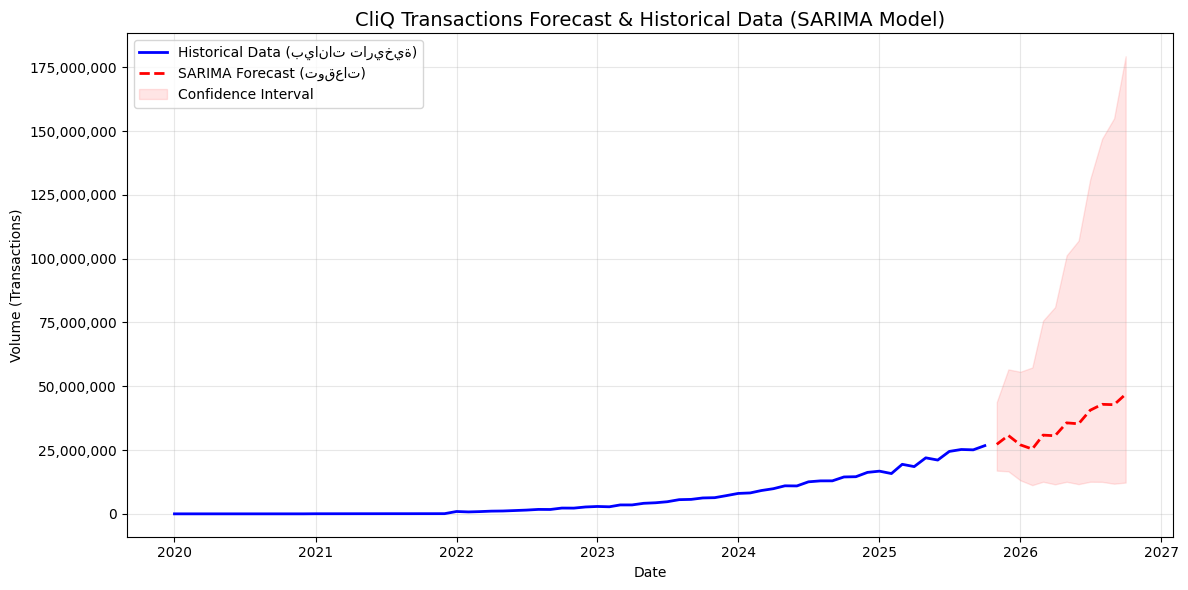

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score
from pandas.tseries.offsets import DateOffset

# =========================================================
# 1. تحميل وتجهيز البيانات (Data Loading & Preprocessing)
# =========================================================
csv_content = """Date,Volume,Value
2020-01-01,436,0.06
2020-02-01,447,0.06
2020-03-01,498,0.07
2020-04-01,537,0.07
2020-05-01,599,0.08
2020-06-01,596,0.08
2020-07-01,684,0.09
2020-08-01,704,0.10
2020-09-01,705,0.10
2020-10-01,788,0.11
2020-11-01,794,0.11
2020-12-01,886,0.12
2021-01-01,35398,4.69
2021-02-01,36273,4.80
2021-03-01,40433,5.35
2021-04-01,43597,5.77
2021-05-01,48605,6.43
2021-06-01,48393,6.41
2021-07-01,55535,7.35
2021-08-01,57168,7.57
2021-09-01,57230,7.58
2021-10-01,63969,8.47
2021-11-01,64405,8.53
2021-12-01,71921,9.52
2022-01-01,919824,93.85
2022-02-01,752274,97.29
2022-03-01,872259,134.82
2022-04-01,1059787,175.21
2022-05-01,1116988,158.29
2022-06-01,1292507,195.93
2022-07-01,1470120,228.10
2022-08-01,1735766,282.08
2022-09-01,1709922,276.19
2022-10-01,2267025,344.71
2022-11-01,2244575,330.11
2022-12-01,2690229,397.19
2023-01-01,2887969,427.79
2023-02-01,2765370,409.80
2023-03-01,3490474,515.74
2023-04-01,3494580,509.92
2023-05-01,4130230,611.75
2023-06-01,4344780,648.41
2023-07-01,4743974,723.30
2023-08-01,5557000,831.74
2023-09-01,5664260,815.00
2023-10-01,6225813,900.03
2023-11-01,6336403,865.53
2023-12-01,7131006,963.76
2024-01-01,7997718,1054.09
2024-02-01,8195374,1077.76
2024-03-01,9135397,1208.32
2024-04-01,9850247,1280.48
2024-05-01,10981675,1378.04
2024-06-01,10933732,1389.30
2024-07-01,12547476,1596.27
2024-08-01,12916484,1617.10
2024-09-01,12930412,1590.85
2024-10-01,14452971,1687.09
2024-11-01,14551375,1619.33
2024-12-01,16249524,1828.11
2025-01-01,16725771,1803.54
2025-02-01,15786184,1708.46
2025-03-01,19405622,2100.14
2025-04-01,18511375,1952.63
2025-05-01,21941156,2179.19
2025-06-01,21074636,2124.74
2025-07-01,24456272,2448.50
2025-08-01,25211461,2454.45
2025-09-01,25077351,2424.45
2025-10-01,26718223,2411.21
"""

# قراءة البيانات
df = pd.read_csv(io.StringIO(csv_content))
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
y = df['Volume']

# التحويل اللوغاريتمي لتقليل التباين والتعامل مع النمو الأسي
y_log = np.log1p(y)

print("✅ تم تحميل البيانات بنجاح.")

# =========================================================
# 2. بناء وتدريب النموذج (Model Training)
# =========================================================
print("⏳ جاري تدريب نموذج SARIMA...")
model = SARIMAX(y_log,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)

# =========================================================
# 3. عرض الملخص الإحصائي (Statistical Summary)
# =========================================================
stats_df = pd.DataFrame({
    'Parameter': results.params.index,
    'Coef (المعامل)': results.params.values,
    'Std Err (الخطأ المعياري)': results.bse.values,
    'T-Value (z)': results.tvalues.values,
    'P-Value (P>|z|)': results.pvalues.values
})

# تنسيق العرض
pd.options.display.float_format = '{:.4f}'.format
print("\n📊 Statistical Summary (Coef, T-value, P-value):")
print("=" * 80)
print(stats_df)
print("=" * 80)

# =========================================================
# 4. حساب دقة النموذج (R-squared)
# =========================================================
# استرجاع القيم المتوقعة (Fitted Values) وإعادتها من Log إلى مقياسها الطبيعي
y_pred_log = results.fittedvalues
y_pred = np.expm1(y_pred_log)
y_true = y

# حساب R2
r2_val = r2_score(y_true, y_pred)

print("\n" + "="*40)
print(f"📊 R-squared Value: {r2_val:.4f}")
print("="*40)
print(f"تفسير النتيجة: النموذج يفسر {r2_val*100:.2f}% من التغيرات في البيانات.")

# =========================================================
# 5. التنبؤ للمستقبل والرسم البياني (Forecasting & Plotting)
# =========================================================
# التنبؤ لمدة 12 شهر قادمة
forecast_steps = 12
forecast_log = results.get_forecast(steps=forecast_steps)

# إرجاع الأرقام من Log إلى قيم حقيقية
forecast_mean = np.expm1(forecast_log.predicted_mean)
conf_int = np.expm1(forecast_log.conf_int())

# إنشاء جدول النتائج المستقبلية
last_date = y.index[-1]
forecast_dates = [last_date + DateOffset(months=x) for x in range(1, forecast_steps + 1)]
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Predicted_Volume': forecast_mean.values,
    'Lower_CI': conf_int.iloc[:, 0].values,
    'Upper_CI': conf_int.iloc[:, 1].values
})

# طباعة جدول التوقعات
print("\n🔮 توقعات الأشهر القادمة (Volume Forecast):")
print(forecast_df[['Date', 'Predicted_Volume']].head(5))

# الرسم البياني
plt.figure(figsize=(12, 6))

# رسم البيانات التاريخية
plt.plot(y.index, y, label='Historical Data (بيانات تاريخية)', color='blue', linewidth=2)

# رسم التوقعات
plt.plot(forecast_df['Date'], forecast_df['Predicted_Volume'], label='SARIMA Forecast (توقعات)', color='red', linestyle='--', linewidth=2)

# تظليل منطقة الثقة
plt.fill_between(forecast_df['Date'], forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='red', alpha=0.1, label='Confidence Interval')

plt.title('CliQ Transactions Forecast & Historical Data (SARIMA Model)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Volume (Transactions)')
plt.legend()
plt.grid(True, alpha=0.3)

# تنسيق الأرقام بالملايين على المحور الصادي
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


📊 تقييم دقة النموذج:
--------------------------------
نسبة الخطأ (MAPE): 4.04%
✅ نسبة الدقة (Accuracy): 95.96%
--------------------------------

مقارنة القيم الحقيقية بالمتوقعة:
              Actual     Predicted    Difference
2025-07-01  24456272 24263165.9029   193106.0971
2025-08-01  25211461 25793073.8722  -581612.8722
2025-09-01  25077351 25825882.8925  -748531.8925
2025-10-01  26718223 29408628.1684 -2690405.1684


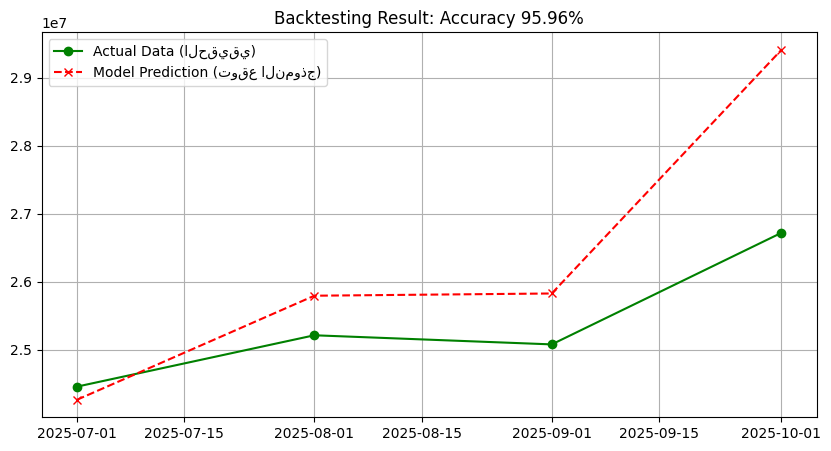

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # بنحتاجه عشان الـ DataFrame

# 1. تقسيم البيانات: تدريب (كل البيانات ما عدا آخر 4 أشهر) واختبار (آخر 4 أشهر)
# ملاحظة: y يجب أن تكون معرفة من الخلية السابقة
train = y.iloc[:-4]  # كل البيانات حتى شهر 6-2025
test = y.iloc[-4:]   # البيانات الحقيقية لأشهر 7, 8, 9, 10 من عام 2025

# 2. بناء النموذج على بيانات التدريب فقط
# نستخدم نفس الإعدادات (SARIMA) مع Log Transformation
model_eval = SARIMAX(np.log1p(train),
                     order=(1, 1, 1),
                     seasonal_order=(1, 1, 1, 12),
                     enforce_stationarity=False,
                     enforce_invertibility=False)
results_eval = model_eval.fit(disp=False)

# 3. التنبؤ بالأشهر الأربعة المخفية
forecast_eval_log = results_eval.get_forecast(steps=4)
forecast_eval = np.expm1(forecast_eval_log.predicted_mean)

# 4. حساب نسبة الخطأ (MAPE)
mape = mean_absolute_percentage_error(test, forecast_eval)
accuracy = 100 - (mape * 100)

print(f"📊 تقييم دقة النموذج:")
print(f"--------------------------------")
print(f"نسبة الخطأ (MAPE): {mape*100:.2f}%")
print(f"✅ نسبة الدقة (Accuracy): {accuracy:.2f}%")
print(f"--------------------------------")

# عرض المقارنة بالأرقام
comparison = pd.DataFrame({'Actual': test, 'Predicted': forecast_eval})
comparison['Difference'] = comparison['Actual'] - comparison['Predicted']
print("\nمقارنة القيم الحقيقية بالمتوقعة:")
print(comparison)

# 5. رسم النتيجة للمقارنة البصرية
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual Data (الحقيقي)', marker='o', color='green')
plt.plot(test.index, forecast_eval, label='Model Prediction (توقع النموذج)', marker='x', color='red', linestyle='--')
plt.title(f'Backtesting Result: Accuracy {accuracy:.2f}%')
plt.legend()
plt.grid(True)
plt.show()